# Simple scenario

## Introduction

This notebook is based on the "create_simple_scenario" scenario. It expands its functionality by including a market in which the agents can trade electricity with each other.

### Required Files

The scenario setup uses the following files:
- **YAML files:** Define configuration for agents (`agents.yaml`), grids (`grids.yaml`), markets (`markets.yaml`), and scenario setup (`setup.yaml`).
- **Excel files:** Contain structured data for agents (`agents.xlsx`).

All files are placed in a structured folder (`single_market`). Its name will automatically be used for the scenario name (unless overwritten).

In [1]:
from hamlet import Creator, Executor, Analyzer

## Step 1: Changes in the YAML files



To include a market in the scenario, we need to make changes to the YAML files in comparison to the "create_simple_scenario" scenario. These have already been made but for clarity are listed here:
 - `agents.yaml`: `sfh/ems/market/strategy`: `reatiler` -> `linear` | This changes the trading strategy, i.e. what the price is the agent asks for its energy. The linear trading strategy increases the price to buy energy and lowers the price to sell energy linearly as we approach the closing time of the market.
  - `markets.yaml`: ` continuous/clearing/method`: `None` -> `pda` | This activates the periodic double auction clearing method. This is a market clearing method that uses the double auction mechanism to determine the price and quantity of energy traded in the market.

## Step 2: Scenario Creation

This step generates the scenario based on YAML and Excel configurations.

In [2]:
# Path to the scenario configuration folder
name = 'scenario_with_market'
path_configs = f"./{name}"

In [3]:
# Instantiate Creator and generate the scenario
creator = Creator(path=path_configs)
creator.new_scenario_from_files()

Successfully created scenario: 100%|██████████| 7/7 [00:03<00:00,  1.25s/it]                                                            

## Step 2: Scenario Execution

Execute the scenario created previously. Hamlet runs the defined scenario and produces results.

The `num_workers` parameter defines how many CPU cores to use for simulation. It is set to one to not call multiprocessing. To use multiprocessing you need to call it from a python file using the following command:

```python

if __name__ == "__main__":
    sim = Executor(path)
    sim.run()


In [4]:
# Path to the scenario created
path_scenario = f"../../scenarios/{name}"

In [5]:
# Instantiate Executor and run the simulation
executor = Executor(path_scenario, num_workers=1)
executor.run()


0it [00:00, ?it/s]
Start execution:   0%|          | 0/24 [00:00<?, ?it/s]
Executing timestamp 2021-03-23 23:00:00+00:00 for region_tasks scenario_with_market:   0%|          | 0/24 [00:00<?, ?it/s]
Executing timestamp 2021-03-23 23:00:00+00:00 for grid:   0%|          | 0/24 [00:08<?, ?it/s]                             
Executing timestamp 2021-03-23 23:00:00+00:00 for grid:   4%|▍         | 1/24 [00:08<03:23,  8.87s/it]
Executing timestamp 2021-03-24 00:00:00+00:00 for region_tasks scenario_with_market:   4%|▍         | 1/24 [00:08<03:23,  8.87s/it]
Executing timestamp 2021-03-24 00:00:00+00:00 for grid:   4%|▍         | 1/24 [00:13<03:23,  8.87s/it]                             
Executing timestamp 2021-03-24 00:00:00+00:00 for grid:   8%|▊         | 2/24 [00:13<02:19,  6.34s/it]
Executing timestamp 2021-03-24 01:00:00+00:00 for region_tasks scenario_with_market:   8%|▊         | 2/24 [00:13<02:19,  6.34s/it]
Executing timestamp 2021-03-24 01:00:00+00:00 for grid:   8%|▊         | 2

## Step 3: Scenario Analysis

Analyze and visualize the results obtained from scenario execution.

The analysis provides visual insights into scenario outcomes, which helps understand scenario dynamics and performance.

In [6]:
# Path to simulation results (you can add multiple results for plots that compare different scenarios)
path_results = {name: f"../../results/{name}"}

In [7]:
# Create the analyzer object
sim = Analyzer(path_results)

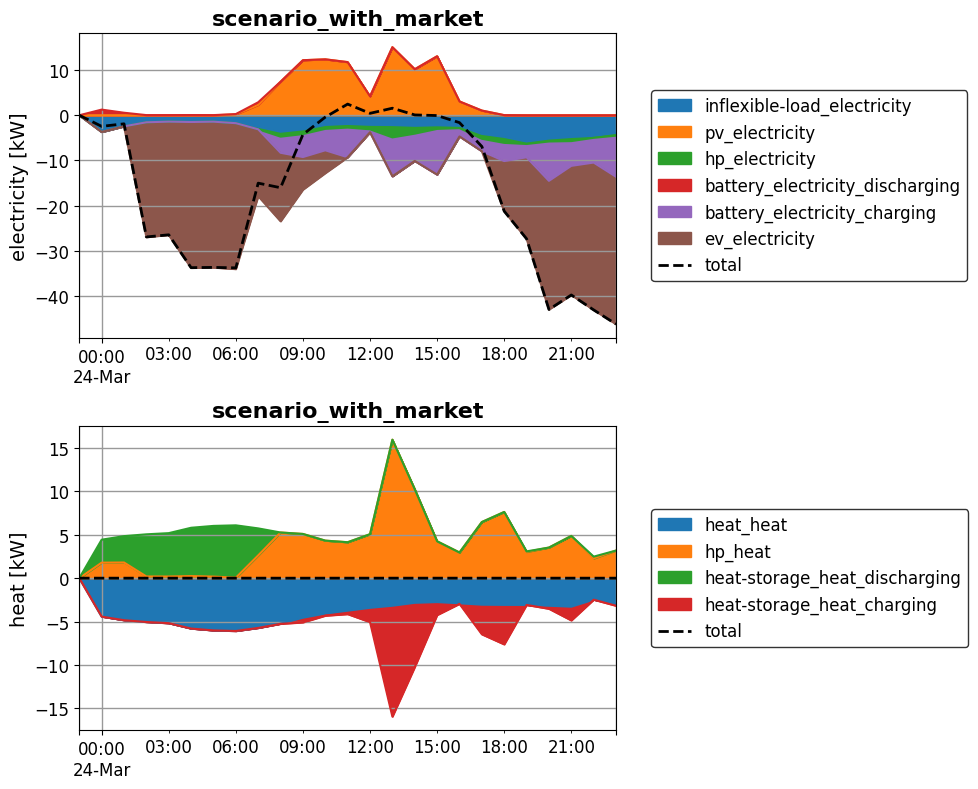

<function hamlet.analyzer.agents.agent_plotter.AgentPlotter.plot_all_meters_data(self, **kwargs)>

In [8]:
# Plot all meters data for the agents, i.e. when was energy produced and consumed
sim.agents.plot_all_meters_data(save_path=None)  # save_path is None by default

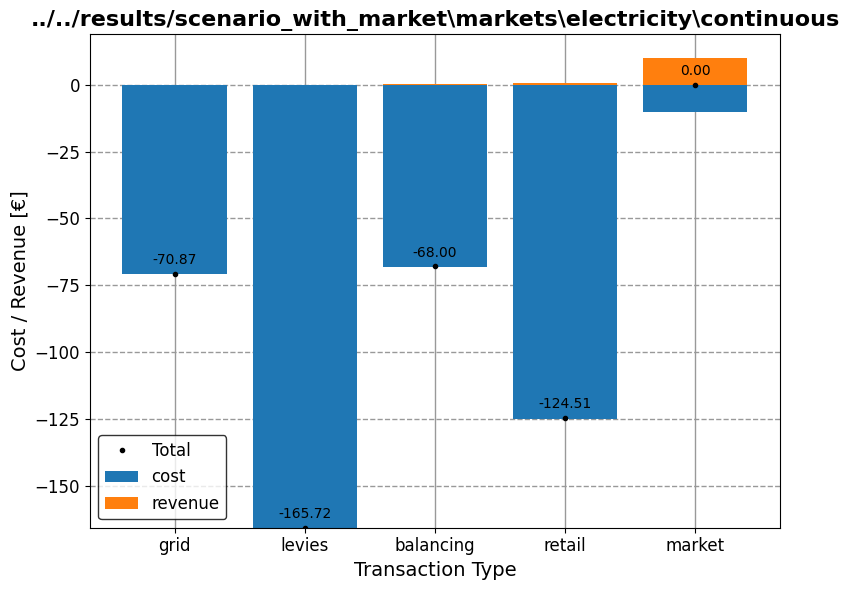

<function hamlet.analyzer.markets.market_plotter.MarketPlotter.plot_total_balancing(self, **kwargs)>

In [9]:
# Plot the total costs and revenues of each energy price component
sim.markets.plot_agent_balancing()

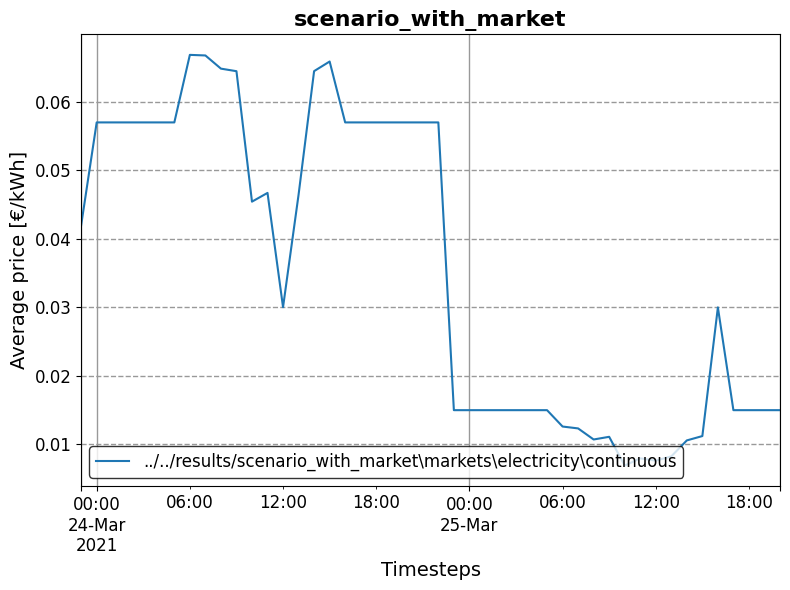

<function hamlet.analyzer.markets.market_plotter.MarketPlotter.plot_average_balancing(self, market_only=False, **kwargs)>

In [11]:
# Plot the average energy price of the market
sim.markets.plot_average_balancing()